<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Что-здесь,-собственно,-происходит" data-toc-modified-id="Что-здесь,-собственно,-происходит-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Что здесь, собственно, происходит</a></span></li><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Загружаем-библиотеки" data-toc-modified-id="Загружаем-библиотеки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загружаем библиотеки</a></span></li><li><span><a href="#Подключаем-дополнительные-настройки" data-toc-modified-id="Подключаем-дополнительные-настройки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подключаем дополнительные настройки</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Базовая-предобработка" data-toc-modified-id="Базовая-предобработка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Базовая предобработка</a></span><ul class="toc-item"><li><span><a href="#Наведем-порядок-в-столбцах" data-toc-modified-id="Наведем-порядок-в-столбцах-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Наведем порядок в столбцах</a></span></li><li><span><a href="#Делаем-данные-лаконичнее" data-toc-modified-id="Делаем-данные-лаконичнее-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Делаем данные лаконичнее</a></span></li></ul></li><li><span><a href="#Переходим-к-нашему-счастью" data-toc-modified-id="Переходим-к-нашему-счастью-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Переходим к нашему счастью</a></span><ul class="toc-item"><li><span><a href="#Где-в-Москве-искать-бар?-(версия-табличная)" data-toc-modified-id="Где-в-Москве-искать-бар?-(версия-табличная)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Где в Москве искать бар? (версия табличная)</a></span></li><li><span><a href="#Визуализируй-это" data-toc-modified-id="Визуализируй-это-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Визуализируй это</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Кросстабы для самых маленьких

## Что здесь, собственно, происходит

Привет! Скорее всего, если ты забрел(а) в эту тетрадку, ты и так понимаешь, что ее цель — познакомить моих друзей с кросстабами. 


Кросстабы — полезный инструмент группировки, обработки и обобщения данных в pandas. По этой причине их можно рассматривать наравне, например, с pivot_table: в некоторых случаях эти два способа можно использовать как взаимозаменяемые.


Кросстабы хорошо показывают себя в задачах, когда нужно разбить данные по разным категориям и посчитать доли в разных разбивках. Их можно визуализировать: как и другие табличные способы представления данных, они компактно упаковываются в хитмэп. На этом мы сегодня и сосредоточимся в этом очень практическом введении.


Для всего остального есть [документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) и дальнейший поиск.

## Постановка задачи

Наша цель — найти бар в Москве. 


Поскольку мы не уверены, что первый же бар удовлетворит все наши скромные потребности, стоит увеличить шансы и направить свои стопы в тот район, где концентрация баров больше всего.


Поскольку мы люди образованные, ученые и вдумчивые, будем внедрять data-driven подход в повседневность, все заранее просчитаем и визуализируем.


Главное, не увлекаться оптимизацией: бар закроется.

![](https://c.tenor.com/zJpxD59doK4AAAAC/black-books-wine.gif)

## Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Подключаем дополнительные настройки

In [2]:
pd.set_option('display.max_columns', None)  # чтобы отображались все колонки

In [3]:
sns.set(rc={'figure.figsize': (10, 6)})  # делает визуализации указанного размера на "сиборновских" осях

## Загружаем данные

Датасет можно найти на портале открытых данных города Москвы, где есть [информация по общественному питанию](https://data.mos.ru/opendata/1903/data/table?versionNumber=1&releaseNumber=88).

In [4]:
from io import BytesIO
import requests
spreadsheet_id = '1Uu1eORimrR2GHWYgkS0B-4hFh1-6zAHo2_L_A7oS-fk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 29 columns):
ID                     18324 non-null object
Name                   18324 non-null object
global_id              18324 non-null object
IsNetObject            18324 non-null object
OperatingCompany       3557 non-null object
TypeObject             18324 non-null object
AdmArea                18324 non-null object
District               18324 non-null object
Address                18324 non-null object
PublicPhone            18324 non-null object
SeatsCount             18324 non-null object
SocialPrivileges       18324 non-null object
Longitude_WGS84        18324 non-null object
Latitude_WGS84         18324 non-null object
ID_en                  1 non-null object
Name_en                1 non-null object
IsNetObject_en         1 non-null object
OperatingCompany_en    1 non-null object
TypeObject_en          1 non-null object
AdmArea_en             1 non-null object
District_en     

In [6]:
data.head()

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Базовая предобработка

### Наведем порядок в столбцах

Поскольку данных на английском нет (а жаль), уберем эту часть.

In [7]:
data = data.drop([
    'Name_en',
    'ID_en',
    'IsNetObject_en',
    'OperatingCompany_en',
    'TypeObject_en',
    'AdmArea_en',
    'District_en',
    'Address_en',
    'PublicPhone_en',
    'SeatsCount_en',
    'SocialPrivileges_en',
    'Longitude_WGS84_en',
    'Latitude_WGS84_en',
    'geodata_center',
    'geoarea'
],
    axis=1)

Уберем также первую строчку: она хранит в себе описание данных.

In [8]:
i = 1
for item in data.columns.to_list():
    print(f'{i}. {item} - {data[item].iloc[0]}')
    i += 1

1. ID - Код
2. Name - Наименование
3. global_id - global_id
4. IsNetObject - Является сетевым
5. OperatingCompany - Название управляющей компании
6. TypeObject - Вид объекта
7. AdmArea - Административный округ по адресу
8. District - Район
9. Address - Адрес
10. PublicPhone - Контактный телефон
11. SeatsCount - Число посадочных мест
12. SocialPrivileges - Показатель социальных льгот
13. Longitude_WGS84 - Долгота в WGS-84
14. Latitude_WGS84 - Широта в WGS-84


In [9]:
data = data.drop(0)

Переименуем: snake_case и лаконичность.

In [10]:
new_columns_name = []
for item in data.columns.to_list():
    new_columns_name.append(re.sub(r'(?<!^)(?=[A-Z])', '_', item).lower())

data.columns = new_columns_name

data = data.rename(
    columns={
        "i_d": "id",
        "is_net_object": "is_chain",
        "longitude__w_g_s84": "longitude",
        "latitude__w_g_s84": "latitude",
        "type_object": "type"
    })

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18323 entries, 1 to 18323
Data columns (total 14 columns):
id                   18323 non-null object
name                 18323 non-null object
global_id            18323 non-null object
is_chain             18323 non-null object
operating_company    3556 non-null object
type                 18323 non-null object
adm_area             18323 non-null object
district             18323 non-null object
address              18323 non-null object
public_phone         18323 non-null object
seats_count          18323 non-null object
social_privileges    18323 non-null object
longitude            18323 non-null object
latitude             18323 non-null object
dtypes: object(14)
memory usage: 2.1+ MB


### Делаем данные лаконичнее

Поскольку нам не нужно официальное многословие, мы можем несколько сократить текст в ячейках без потери смысла. 


Это улучшит наши визуализации.

In [12]:
data.head()

,id,name,global_id,is_chain,operating_company,type,adm_area,district,address,public_phone,seats_count,social_privileges,longitude,latitude
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200
5,00148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",PublicPhone:(495) 697-04-89\n\n,10,нет,37.5981275484399900,55.7473904905259940


In [13]:
data['adm_area'] = data['adm_area'].str.replace(' административный округ', '')

In [14]:
data['adm_area'].unique()

array(['Северо-Восточный', 'Центральный', 'Юго-Восточный', 'Западный',
       'Юго-Западный', 'Северный', 'Восточный', 'Южный',
       'Северо-Западный', 'Зеленоградский', 'Троицкий', 'Новомосковский'],
      dtype=object)

In [15]:
data['type'] = data['type'].replace('предприятие быстрого обслуживания', 'фаст-фуд')
data['type'] = data['type'].replace('магазин (отдел кулинарии)', 'кулинария')

In [16]:
data['type'].unique()

array(['кафе', 'ресторан', 'столовая', 'фаст-фуд', 'кафетерий', 'буфет',
       'бар', 'закусочная', 'кулинария'], dtype=object)

## Переходим к нашему счастью

### Где в Москве искать бар? (версия табличная)

Начнем мы с того, что сделаем разбивку данных по:
* административным округам
* типам заведения.


Считать будем по количеству id заведений. Чтобы судить не по абсолютным, а относительным цифрам, будем считать долю в общей массе данных.

In [17]:
pd.crosstab(
    index=data.adm_area,  # группируем по округам по горизонтали
    columns=data.type,  # группируем по типам заведений по вертикали
    values=data.id,  # используем id для действия aggfunc
    normalize=True,  # считать долю от всей массы данных
    margins=True,  # покажем промежуточный итог
    aggfunc='count')  # считаем айдишники (values)

type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст-фуд,All
adm_area,,,,,,,,,,
Восточный,0.004148,0.002128,0.002074,0.022595,0.006604,0.003929,0.005512,0.012116,0.020248,0.079354
Западный,0.002783,0.004639,0.002947,0.029744,0.004912,0.001364,0.013917,0.011406,0.013207,0.084921
Зеленоградский,0.001364,0.000164,0.000218,0.003602,0.001583,0.000655,0.000982,0.004475,0.002183,0.015227
Новомосковский,0.001692,0.000546,0.001255,0.019265,0.003602,0.000600,0.004039,0.000873,0.008023,0.039895
Северный,0.004148,0.003329,0.003056,0.033946,0.011461,0.001910,0.011297,0.011024,0.011570,0.091743
Северо-Восточный,0.003384,0.001201,0.003329,0.030126,0.008350,0.002347,0.006058,0.015609,0.018392,0.088796
Северо-Западный,0.002838,0.001255,0.002292,0.013207,0.003056,0.003111,0.005403,0.008459,0.005894,0.045517
Троицкий,0.000273,0.000055,0.000218,0.004475,0.000109,0.000164,0.001092,0.000546,0.001419,0.008350
Центральный,0.034656,0.006113,0.004148,0.122960,0.015991,0.004039,0.055504,0.016973,0.016537,0.276920


Заметили? У нас появились столбец и строка под названием `All`. Это промежуточный итог: мы указали, что хотим получить долю каждой категории, по вертикали и горизонтально, суммарно (`normalize=True`).


Мы также могли промежуточный итог по вертикали (`normalize='columns'`: в нашем случае получится доля заведений конкретного округа в общей массе данных) или горизонтали (`normalize='index'`: доля заведений каждого типа).


Однако такое представление данных мало что говорит (хоть и может сказать многое). Чтобы улучшить наглядность, оставим два знака после запятой.

In [18]:
round(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю от всей массы данных
        margins=True,  # покажем долю каждой категории суммарно
        aggfunc='count'),  # вот это будем делать с values
    2)  # оставляем два знака до запятой

type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст-фуд,All
adm_area,,,,,,,,,,
Восточный,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.02,0.08
Западный,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.01,0.01,0.08
Зеленоградский,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
Новомосковский,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.04
Северный,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.01,0.01,0.09
Северо-Восточный,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.02,0.02,0.09
Северо-Западный,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.05
Троицкий,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
Центральный,0.03,0.01,0.00,0.12,0.02,0.00,0.06,0.02,0.02,0.28


Уже лучше, но не оптимально. Отсортируем данные по барам.

In [19]:
(round(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю от всей массы данных
        margins=True,  # покажем долю каждой категории суммарно
        aggfunc='count'),  # вот это будем делать с values
    2)  # оставляем до двух знаков до запятой
 .sort_values(
     by='бар',  # сортируем по барам
     ascending=False)  # больше - выше
 )

type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст-фуд,All
adm_area,,,,,,,,,,
All,0.07,0.02,0.03,0.37,0.07,0.02,0.13,0.12,0.16,1.00
Центральный,0.03,0.01,0.00,0.12,0.02,0.00,0.06,0.02,0.02,0.28
Южный,0.01,0.00,0.00,0.04,0.01,0.00,0.01,0.02,0.03,0.12
Восточный,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.02,0.08
Западный,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.01,0.01,0.08
Зеленоградский,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
Новомосковский,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.04
Северный,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.01,0.01,0.09
Северо-Восточный,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.02,0.02,0.09


Глядя на это, мы уже можем сдеать выводы:
* На бары приходится 7% заведений в нашей базе.
* Бары Центрального административного округа составляют около 3% от общей массы. Учитывая, что речь идет одновременно о разбивке по административному делению и категории объекта, результат солидный. Значит, нам туда дорога, значит, нам туда дорога.


Однако давайте еще немного поиграем с данными.

Мы можем считать долю не в общей массе записей, а, например, идя только по горизонтали или вертикали.


Например, покажем, сколько процентов заведений каждой категории приходится на каждый административный округ.


В нашем случае это означает, что мы будем идти по вертикали: `normalize='columns'`. Это единственное отличие этой таблички от той, что была сделана выше.

In [20]:
(
    round(pd.crosstab(index=data.adm_area,  # группируем по округам
            columns=data.type,  # группируем по типам заведений
            values=data.id,  # используем id для действия aggfunc
            normalize='columns',  # считать долю от категории 'columns'
            aggfunc='count'), # вот это будем делать с values
      2)  # оставляем до двух знаков до запятой
    .sort_values(by='бар',  # сортируем по барам
                 ascending=False)  # больше - выше
)

type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст-фуд
adm_area,,,,,,,,,
Центральный,0.51,0.25,0.14,0.33,0.21,0.17,0.43,0.14,0.11
Южный,0.09,0.06,0.10,0.10,0.13,0.10,0.09,0.14,0.18
Восточный,0.06,0.09,0.07,0.06,0.09,0.16,0.04,0.10,0.13
Северный,0.06,0.14,0.10,0.09,0.15,0.08,0.09,0.09,0.07
Северо-Восточный,0.05,0.05,0.11,0.08,0.11,0.10,0.05,0.13,0.12
Юго-Западный,0.05,0.06,0.07,0.08,0.08,0.09,0.06,0.11,0.10
Западный,0.04,0.19,0.10,0.08,0.07,0.06,0.11,0.10,0.08
Северо-Западный,0.04,0.05,0.08,0.04,0.04,0.13,0.04,0.07,0.04
Юго-Восточный,0.04,0.08,0.17,0.07,0.04,0.06,0.05,0.07,0.09


51% московских баров находятся в Центральном административном округе! Это несоменное достижение.


На втором месте этого первенства ЮАО, где не наберется и десятка процентов.

Мы можем также (зачем-то) показать, какой процент заведений каждого округа составляют бары, столовые, кулинарии и прочее.


Для этого мы должны поставить `normalize='index'`.

In [21]:
(round(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize='index',  # считать долю от категории 'index'
        aggfunc='count'),  # вот это будем делать с values
    2)  # оставляем до двух знаков до запятой
 .sort_values(
     by='бар',  # сортируем по барам
     ascending=False)  # больше - выше
 )

type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст-фуд
adm_area,,,,,,,,,
Центральный,0.13,0.02,0.01,0.44,0.06,0.01,0.20,0.06,0.06
Зеленоградский,0.09,0.01,0.01,0.24,0.10,0.04,0.06,0.29,0.14
Северо-Западный,0.06,0.03,0.05,0.29,0.07,0.07,0.12,0.19,0.13
Южный,0.06,0.01,0.03,0.32,0.08,0.02,0.10,0.14,0.24
Восточный,0.05,0.03,0.03,0.28,0.08,0.05,0.07,0.15,0.26
Северный,0.05,0.04,0.03,0.37,0.12,0.02,0.12,0.12,0.13
Юго-Западный,0.05,0.02,0.03,0.36,0.08,0.03,0.09,0.15,0.20
Новомосковский,0.04,0.01,0.03,0.48,0.09,0.02,0.10,0.02,0.20
Северо-Восточный,0.04,0.01,0.04,0.34,0.09,0.03,0.07,0.18,0.21


13% от заведений в центре приходится на бары. Неплохо, но с кафе и рЭсторанами им не сравниться.

### Визуализируй это

Конечно, имея под рукой собрание адресов и координат, мы всегда можем сделать визуализировать географические данные.


Сегодня, однако, мы немного поиграем с таблицами.

Самый простой и приятный способ визуализировать кросстабы — набросить на них хитмэп.

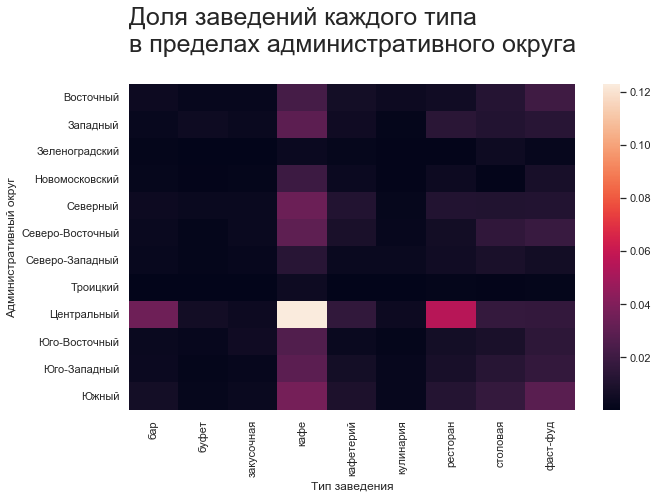

In [22]:
sns.heatmap(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю от общей массы
        aggfunc='count')  # вот это будем делать с values
)

plt.title('Доля заведений каждого типа\nв пределах административного округа\n',
          fontsize=25,
          loc='left')

plt.xlabel('Тип заведения')
plt.ylabel('Административный округ')
plt.show()

Любопытно, но не слишком хорошо: кафе ЦАО перехватывают все внимание на себя, погружая практически все во тьму.


Бары мы так найдем, конечно (все там же, в центре), но лучше будет, если мы совместим хитмэп и табличное отображение данных: цвет и точные относительные цифры сориентируют нас намного лучше.

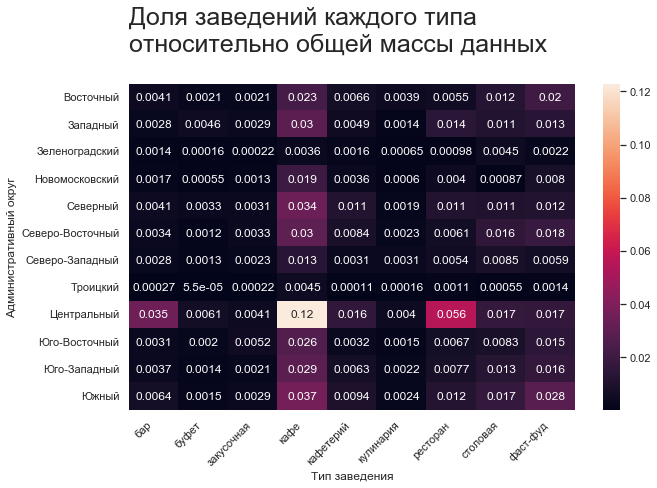

In [23]:
sns.heatmap(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю в общей массе
        aggfunc='count'),  # вот это будем делать с values
    annot=True)  # пусть пишет значения в цветные квадратики, ок?
plt.title('Доля заведений каждого типа\nотносительно общей массы данных\n',
          fontsize=25,
         loc='left')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тип заведения')
plt.ylabel('Административный округ')
plt.show()

Там, где есть десятичные дроби, всегда будут и проценты.


Сделаем.

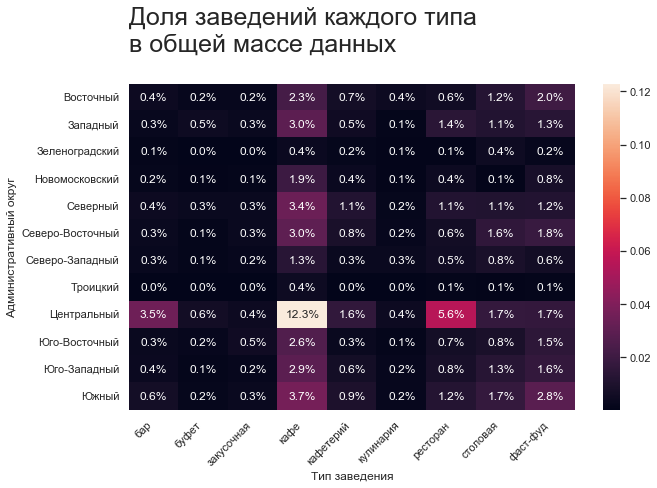

In [24]:
sns.heatmap(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю от общей массы
        aggfunc='count'),  # вот это будем делать с values
    annot=True,  # пусть пишет значения в цветные квадратики
    fmt='.1%')  # и эти значения пересчитает в процентах
plt.title('Доля заведений каждого типа\nв общей массе данных\n',
          fontsize=25,
          loc='left')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тип заведения')
plt.ylabel('Административный округ')
plt.show()

Уже лучше, правда?


Чтобы сфокусировать больше внимания на нашем целевом столбце, отсортируем данные в нашем кросстабе по барам.


очень важно не запутаться в скобках и запятых: полезной практикой может быть расстановка отступов для структурирования кода (здесь предпринята такая попытка, но каждый может сделать лучше).

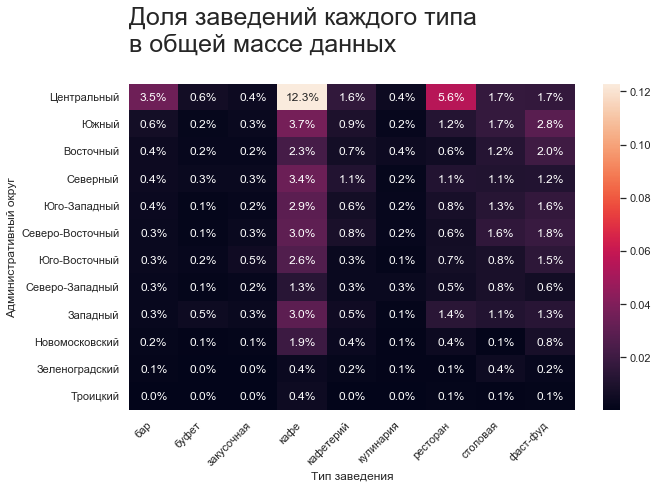

In [25]:
sns.heatmap(
    pd.crosstab(
        index=data.adm_area,  # группируем по округам
        columns=data.type,  # группируем по типам заведений
        values=data.id,  # используем id для действия aggfunc
        normalize=True,  # считать долю от общей массы
        aggfunc='count')  # вот это будем делать с values
    .sort_values(by='бар',
                 ascending=False),  
    annot=True,  # пусть пишет значения в цветные квадратики
    fmt='.1%')  # и эти значения пересчитает в процентах
plt.title('Доля заведений каждого типа\nв общей массе данных\n',
          fontsize=25,
          loc='left')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тип заведения')
plt.ylabel('Административный округ')
plt.show()

Мы уже понимаем: начав в центре, мы можем в какой-то момент переместиться на юг, подобно перелетным птицам. 


Последние штрихи: докрутим некоторые детали, которые могут сделать нашу визуализацию более приятной и наглядной на вид. Например, мне не очень нравится набор цветов по умолчанию (`inferno`): `viridis`, с его плавными переходами цвета, подойдет под наши задачи.

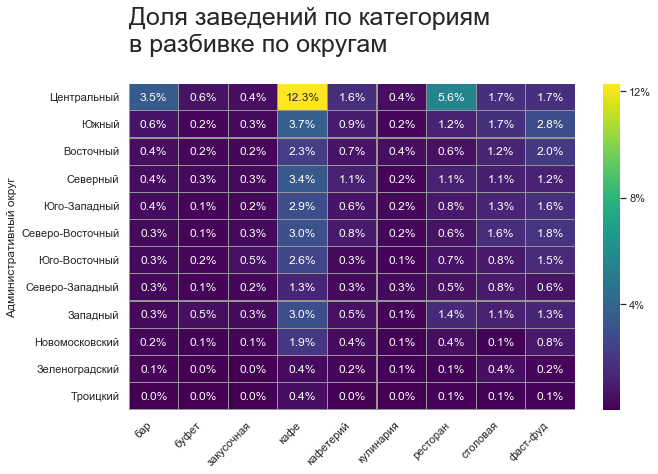

Серая ячейка: нет данных.


In [26]:
ax = sns.heatmap(pd.crosstab(index=data.adm_area,
                             columns=data.type,
                             values=data.id,
                             normalize=True,
                             aggfunc='count')
                 .replace(0.000000, np.nan)
                 .sort_values(by='бар',
                              ascending=False),
                 annot=True,
                 fmt='.1%',
                 linewidths=.15, # Отрисовка границ ячеек
                 linecolor='#959595',  # вот этим цветом.
                 cmap='viridis') # Палитра для визуализации.

# Задаем цвет для NaN-значений, если такие возникнут.
ax.patch.set(color='#2c2c2c', alpha=0.5)

# Это позволит нам кастомизировать цветовую шкалу в легенде.
# Например, как здесь: нанеся на нее деления в процентах.
cbar = ax.collections[0].colorbar
cbar.set_ticks([.04,
                .08,
                .12])
cbar.set_ticklabels(['4%',
                     '8%',
                     '12%'])

# Вертит текст для насечек оси x.
plt.xticks(rotation=45,
           ha='right')

plt.ylabel('Административный округ')
plt.xlabel(None)
plt.title('Доля заведений по категориям\nв разбивке по округам\n',
          fontsize=25,
          loc='left')
plt.show()
print('Серая ячейка: нет данных.')

Добавим немного отступов в код, чтобы вы выбрали, какой способ для вас читаемее, и посмотрим уже на районы, а не округа.

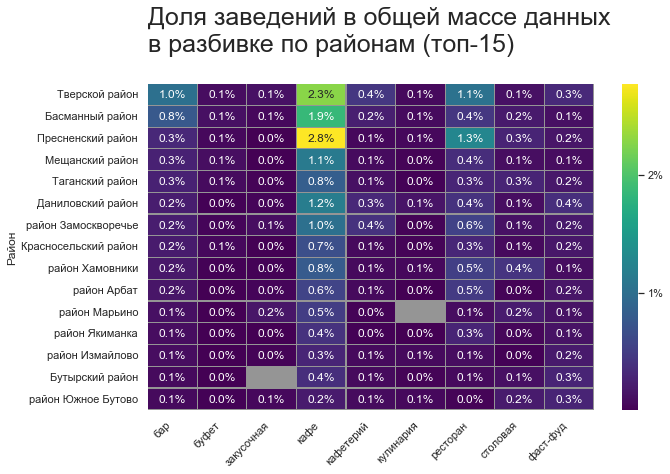

Серая ячейка: нет данных.


In [27]:
ax = sns.heatmap(  # Возьмем указания по хитмэпу в скобки.
    (  # Возьмем указания по кросстабу в скобки.
        pd.crosstab(index=data.district,
                    columns=data.type,
                    values=data.id,
                    normalize=True,
                    aggfunc='count')
        .replace(0.000000, np.nan)
        .sort_values(by='бар',
                     ascending=False)
        .head(15)  # Первые 15 строк.
    ),  # Закончили с кросстабом, перешли к хитмэпу.
    annot=True,
    fmt='.1%',
    linewidths=.15,  # Отрисовка границ ячеек
    linecolor='#959595',  # вот этим цветом.
    cmap='viridis'  # Палитра для визуализации.
)  # 

# Задаем цвет для NaN-значений, если такие возникнут.
ax.patch.set(color='#2c2c2c', alpha=0.5)

# Это позволит нам кастомизировать цветовую шкалу в легенде.
# Например, как здесь: нанеся на нее деления в процентах.
cbar = ax.collections[0].colorbar
cbar.set_ticks([.00,
                .01,
                .02])
cbar.set_ticklabels(['0%',
                     '1%',
                     '2%'])

# Вертит текст для насечек оси x.
plt.xticks(rotation=45,
           ha='right')

plt.ylabel('Район')
plt.xlabel(None)
plt.title('Доля заведений в общей массе данных\nв разбивке по районам (топ-15)\n',
          fontsize=25,
          loc='left')
plt.show()
print('Серая ячейка: нет данных.')

## Выводы

**Наше путешествие, судя по всему, начнется где-то в Тверском районе, а дальше мы переместимся в Басманный.**<br><br>
Оба района находятся в Центральном административном округе, так что, пожалуй, это нам по силам.<br>Бары ЦАО, как мы помним, составляют около 3% от общей массы московских заведений, а потому шансы найти что-то интересное довольно высоки.<br><br>
Дальше — как пойдет.<br>
Главное, не искать закусочные в Бутырском районе, а кулинарии — в Марьино.